In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from NSEDownload import stocks
import numpy as np

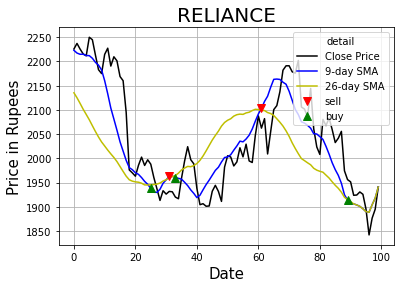

In [11]:
df= pd.read_csv("RELIANCE.csv").head(100)
cp_data = df[['Close Price']]
def smaCal(days):
    sma_list = list()
    for i in range(0,cp_data.size):
            sma_list.append(cp_data.iloc[i:i+days,0:1].mean()['Close Price'])
    return sma_list
sma_data =pd.DataFrame({"SMA 9":smaCal(9),"SMA 26":smaCal(26)})
sma_data['num'] = sma_data.reset_index().index
sma_data.set_index('num')
df = df.join([sma_data["SMA 9"],sma_data["SMA 26"]])
closePrice = df['Close Price'].head(200)
SMA9 = df['SMA 9'].head(200)
SMA26 = df['SMA 26'].head(200)
Dats = df.head(200).index
df['Signal'] = 0.0
df['Signal'] = np.where(df['SMA 9'] > df['SMA 26'], 1.0, 0.0)
df['Position'] = df['Signal'].diff()
# plot close price, short-term and long-term moving averages 
df['Close Price'].plot(color = 'k', label= 'Close Price') 
df['SMA 9'].plot(color = 'b',label = '9-day SMA') 
df['SMA 26'].plot(color = 'y',label = '26-day SMA')
# plot ‘buy’ signals
plt.plot(df[df['Position'] == 1].index,
         df['SMA 9'][df['Position'] == 1],'v',
         markersize = 8, color = 'r', label = 'sell')
# plot ‘sell’ signals
plt.plot(df[df['Position'] == -1].index,
         df['SMA 9'][df['Position'] == -1],'^', 
         markersize = 8, color = 'g', label = 'buy')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('RELIANCE', fontsize = 20)
plt.legend(title='detail')
plt.grid()
plt.show()
